Dados Carregados (5 primeiras linhas):
   age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0   78        0                       285         0                 22   
1   91        0                       438         0                 64   
2   68        1                      1039         0                 33   
3   54        1                      1807         0                 75   
4   82        1                       812         0                 49   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    0     396860              5.69           133    1   
1                    1     419565              1.65           132    0   
2                    0     368008              6.89           124    1   
3                    1     167727              6.08           136    1   
4                    1     154358              8.63           120    1   

   smoking  time  DEATH_EVENT  
0        0   161            1  
1      

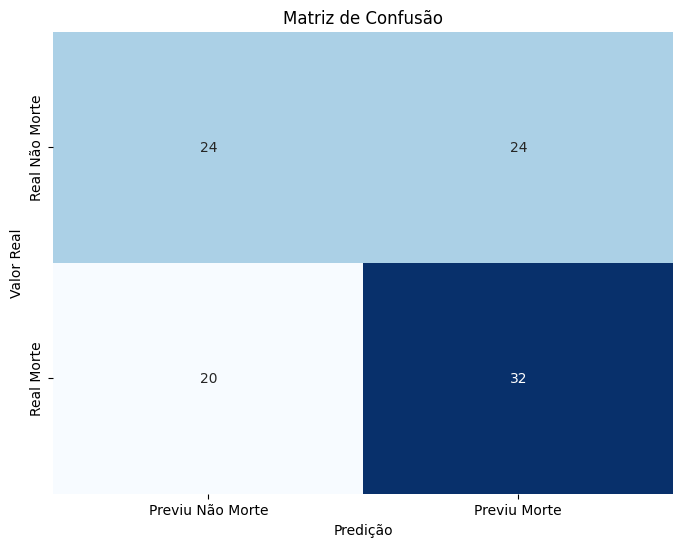


Importância das Features:
serum_creatinine            0.142217
platelets                   0.141361
creatinine_phosphokinase    0.137793
time                        0.131207
ejection_fraction           0.116556
serum_sodium                0.114978
age                         0.114124
diabetes                    0.021749
anaemia                     0.021341
high_blood_pressure         0.020476
sex                         0.020012
smoking                     0.018187
dtype: float64


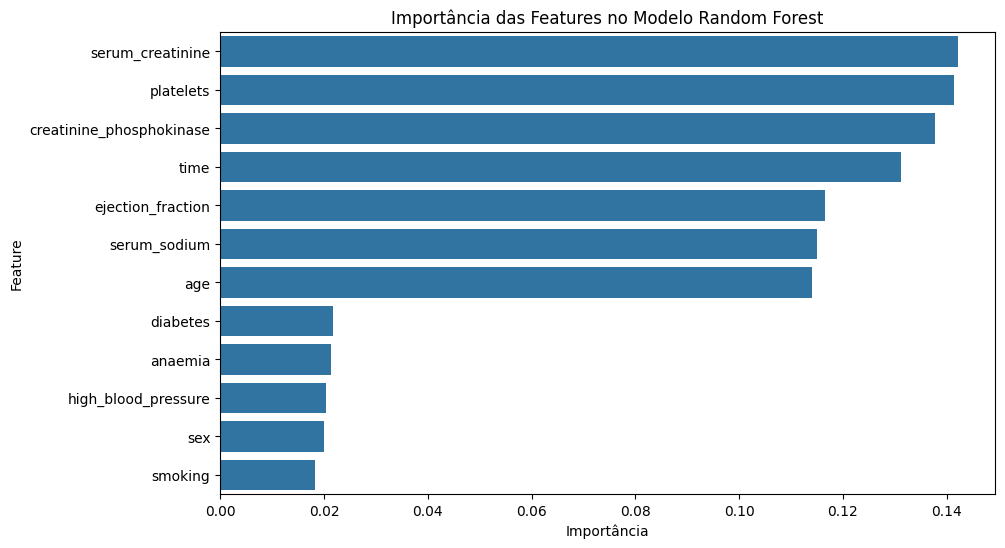


Dados do Novo Paciente (não escalados):
   age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0   65        0                       100         1                 35   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    0     250000               1.5           135    1   

   smoking  time  
0        0   100  

Predição para o Novo Paciente (0 = Não Morte, 1 = Morte): 0
Probabilidade de Morte para o Novo Paciente: 0.3800
Este paciente tem baixa probabilidade de ter um evento de morte relacionado à insuficiência cardíaca, de acordo com o modelo.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Geração/Carregamento de Dados (Exemplo Simplificado) ---
# Em um cenário real, você carregaria dados de um arquivo CSV, banco de dados, etc.
# Exemplo: df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Para demonstração, vamos simular dados sintéticos baseados em um dataset comum.
# As colunas abaixo são inspiradas em datasets públicos de insuficiência cardíaca.
np.random.seed(42) # Para reprodutibilidade

num_samples = 500
data = {
    'age': np.random.randint(40, 95, num_samples),
    'anaemia': np.random.randint(0, 2, num_samples), # 0 = no, 1 = yes
    'creatinine_phosphokinase': np.random.randint(50, 2000, num_samples),
    'diabetes': np.random.randint(0, 2, num_samples), # 0 = no, 1 = yes
    'ejection_fraction': np.random.randint(20, 80, num_samples), # %
    'high_blood_pressure': np.random.randint(0, 2, num_samples), # 0 = no, 1 = yes
    'platelets': np.random.randint(150000, 450000, num_samples),
    'serum_creatinine': np.random.uniform(0.5, 9.0, num_samples).round(2),
    'serum_sodium': np.random.randint(110, 150, num_samples),
    'sex': np.random.randint(0, 2, num_samples), # 0 = female, 1 = male
    'smoking': np.random.randint(0, 2, num_samples), # 0 = no, 1 = yes
    'time': np.random.randint(1, 280, num_samples), # Follow-up time in days
    'DEATH_EVENT': np.random.randint(0, 2, num_samples) # Target variable: 0 = No Death, 1 = Death (proxy for severe outcome)
}
df = pd.DataFrame(data)

print("Dados Carregados (5 primeiras linhas):")
print(df.head())
print("\nInformações do Dataset:")
df.info()
print("\nEstatísticas Descritivas:")
print(df.describe())

# --- 2. Pré-processamento de Dados ---
# Divisão de features (X) e target (y)
X = df.drop('DEATH_EVENT', axis=1) # Todas as colunas, exceto 'DEATH_EVENT'
y = df['DEATH_EVENT'] # A coluna 'DEATH_EVENT' é o nosso alvo

# Divisão dos dados em conjuntos de treinamento e teste
# test_size=0.2 significa 20% dos dados para teste, random_state para reprodutibilidade
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # stratify para manter a proporção da classe alvo

print(f"\nTamanho do conjunto de treinamento (X_train): {X_train.shape}")
print(f"Tamanho do conjunto de teste (X_test): {X_test.shape}")
print(f"Proporção da classe alvo no treinamento:\n{y_train.value_counts(normalize=True)}")
print(f"Proporção da classe alvo no teste:\n{y_test.value_counts(normalize=True)}")

# Escalonamento de Features Numéricas
# É importante escalar features que possuem diferentes escalas (e.g., idade vs. creatinina_phosphokinase)
# StandardScaler padroniza as features para ter média 0 e desvio padrão 1.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Fit e transform nos dados de treino
X_test_scaled = scaler.transform(X_test)       # Apenas transform nos dados de teste (usando o scaler treinado)

# O output do scaler é um array numpy, vamos convertê-lo de volta para DataFrame para manter os nomes das colunas
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("\nDados Escalonados (5 primeiras linhas de X_train_scaled_df):")
print(X_train_scaled_df.head())

# --- 3. Treinamento do Modelo ---
# Vamos usar um Random Forest Classifier, que geralmente performa bem
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced') # n_estimators: número de árvores na floresta
                                                                                       # class_weight='balanced' para lidar com classes desbalanceadas

print("\nTreinando o modelo...")
model.fit(X_train_scaled_df, y_train)
print("Modelo treinado com sucesso!")

# --- 4. Avaliação do Modelo ---
print("\nAvaliando o modelo no conjunto de teste...")
y_pred = model.predict(X_test_scaled_df)
y_pred_proba = model.predict_proba(X_test_scaled_df)[:, 1] # Probabilidades para a classe positiva (1)

# Métricas de avaliação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall (Sensibilidade): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("\nMatriz de Confusão:")
print(conf_matrix)

# Visualização da Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Previu Não Morte', 'Previu Morte'],
            yticklabels=['Real Não Morte', 'Real Morte'])
plt.xlabel('Predição')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()

# Importância das Features (apenas para Random Forest)
if hasattr(model, 'feature_importances_'):
    feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
    print("\nImportância das Features:")
    print(feature_importances)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances, y=feature_importances.index)
    plt.title('Importância das Features no Modelo Random Forest')
    plt.xlabel('Importância')
    plt.ylabel('Feature')
    plt.show()

# --- 5. Exemplo de Predição para um Novo Paciente ---
# Imagine um novo paciente com as seguintes características (escaladas!)
# Em um cenário real, você coletaria os dados do novo paciente e os escalaria usando o 'scaler' treinado.
new_patient_data = pd.DataFrame([[65, 0, 100, 1, 35, 0, 250000, 1.5, 135, 1, 0, 100]],
                                columns=X.columns)

# Escalonar os dados do novo paciente
new_patient_scaled = scaler.transform(new_patient_data)

# Fazer a predição
prediction = model.predict(new_patient_scaled)
prediction_proba = model.predict_proba(new_patient_scaled)[:, 1]

print(f"\nDados do Novo Paciente (não escalados):\n{new_patient_data}")
print(f"\nPredição para o Novo Paciente (0 = Não Morte, 1 = Morte): {prediction[0]}")
print(f"Probabilidade de Morte para o Novo Paciente: {prediction_proba[0]:.4f}")

if prediction[0] == 1:
    print("Este paciente tem alta probabilidade de ter um evento de morte relacionado à insuficiência cardíaca, de acordo com o modelo.")
else:
    print("Este paciente tem baixa probabilidade de ter um evento de morte relacionado à insuficiência cardíaca, de acordo com o modelo.")